3.1 Convergence and attractors

Truc important à savoir pour cette partie :
 - Les poids c'est la mémoire qu'on a sur des patterns donnés$
 - J'ai repris et adapté la fonction de Marie Ange pour le training
 Il faut bel et bien faire une boucle avec le nombre d'itération et ne pas s'arréter dès qu'on a un point fixe
 (car il y a potentiellement plusieurs points fixe, enfin je crois....)

In [26]:
import numpy as np

def compute_weights(X):
    P = X.shape[0]
    outer_products = [np.array([np.outer(X[i], X[i])]) for i in range(P)]
    W = 0
    for i in range(len(outer_products)):
        W += outer_products[i]
    return W[0, :, :]
    # return W[0, :, :]/float(N) #for section 3.3

def sgnWX(W, X, i):
    return np.where(W@X[i] >= 0, 1, -1)

def generate_data(d_type):
    # For task 3.1
    if d_type == "original":
        x1d = [-1, -1, 1, -1, 1, -1, -1, 1]
        x2d = [-1, -1, -1, -1, -1, 1, -1, -1]
        x3d = [-1, 1, 1, -1, -1, 1, -1, 1]
        return np.vstack([x1d, x2d, x3d])

    elif d_type == "distorted":
        x1d = [1, -1, 1, -1, 1, -1, -1, 1]
        x2d = [1, 1, -1, -1, -1, 1, -1, -1]
        x3d = [1, 1, 1, -1, 1, 1, -1, 1]
        return np.vstack([x1d, x2d, x3d])
    
    elif d_type == "dissimilar":
        x1d = [-1, -1, -1, -1, 1, 1, 1, 1]
        x2d = [-1, 1, -1, 1, -1, -1, -1, 1]
        x3d = [1, 1, 1, -1, 1, -1, -1, 1]
        return np.vstack([x1d, x2d, x3d]) 



def training(weight,pattern, max_iteration=100):
    W = weight.copy()
    X = pattern.copy()
    count = 0

    while (count <= max_iteration):
        fixed_point_idx_list = []
        for i in range(X.shape[0]):
            if (sgnWX(W, X, i) == X[i]).all: # W = sgn(WX) ?
                #print("A fixed point has been reached !")
                fixed_point_idx_list.append(i)
            
            X[i] = sgnWX(W, X, i) #Update rule
        count+=1
    return X, fixed_point_idx_list

    

In [27]:
pattern = generate_data("original")
print(pattern.T @ pattern == compute_weights(pattern))
# Tu t'es vraiment fait chier Marie-Ange mdrr

# PS de Victor : C'est cöme qui a écrit ça, promis c pas moi

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [28]:
max_iteration = 2 # the needed is log(N) but we make it larger to be safe

pattern = generate_data("original")
pattern_distorted = generate_data("distorted")

weight = compute_weights(pattern) # computation of weight for training
updated_pattern, dpl_pattern = training(weight, pattern, max_iteration) # original weight computed so normally we have 3 fixed point
updated_updated_distorted, dpl_pattern_distorted = training(weight, pattern_distorted, max_iteration)

print("\nOriginal patterns:\n", pattern)
print("\nUpdated patterns:\n", updated_pattern)
print("\nWith a number of fixed point of:", len(dpl_pattern), " which indices are", dpl_pattern)
print("\nUpdated distorted:\n", updated_updated_distorted)
print("\nWith a number of fixed point of:", len(dpl_pattern_distorted), " which indices are", dpl_pattern_distorted)



Original patterns:
 [[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]

Updated patterns:
 [[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]

With a number of fixed point of: 3  which indices are [0, 1, 2]

Updated distorted:
 [[-1 -1  1 -1  1 -1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]

With a number of fixed point of: 3  which indices are [0, 1, 2]


What is an attractor ?
It is basically the same as a fixed point. It correspond to a minimum of energy and it is a stable point



In [29]:
def attractors_finder(data, weight):
    data_updated,_ = training(weight, data, max_iteration)
    attractors = np.unique(data_updated, axis=0) #find a unique element in the data set (see example to understand better)
    return attractors

attractors_with_original = attractors_finder(pattern, weight)
print("\nThe attractors with original data are:\n")
print(attractors_with_original)
print(attractors_with_original.shape[0])

attractors_with_distorted = attractors_finder(pattern_distorted, weight)
print("\nThe attractors with original data are:\n")
print(attractors_with_distorted)
print(attractors_with_distorted.shape[0])


import itertools
attractor_data = np.array(list(itertools.product([-1, 1], repeat=8)))

attractors = attractors_finder(attractor_data, weight)
print("\nThe attractors with other data are: \n")
print(attractors)
print(attractors.shape[0])



The attractors with original data are:

[[-1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1  1 -1  1 -1 -1  1]
 [-1  1  1 -1 -1  1 -1  1]]
3

The attractors with original data are:

[[-1 -1  1 -1  1 -1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]
3

The attractors with other data are: 

[[-1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1 -1  1]
 [-1 -1  1 -1  1 -1 -1  1]
 [-1 -1  1 -1  1  1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]
 [-1  1  1 -1  1 -1 -1  1]
 [ 1 -1 -1  1  1 -1  1 -1]
 [ 1  1 -1  1 -1  1  1 -1]
 [ 1  1 -1  1  1 -1  1 -1]
 [ 1  1 -1  1  1  1  1 -1]
 [ 1  1  1  1 -1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]]
14


In [30]:
max_iteration = 1000 # the needed is log(N) but we make it larger to be safe

pattern_dissi = generate_data("dissimilar")


weight = compute_weights(pattern) # computation of weight for training
updated_pattern_dissi, dpl_pattern_dissi = training(weight, pattern_dissi, max_iteration) # original weight computed so normally we have 3 fixed point


print("\nOriginal patterns:\n", pattern)
print("\nUpdated patterns:\n", updated_pattern_dissi)
print("\nWith a number of fixed point of:", len(dpl_pattern_dissi), " which indices are", dpl_pattern_dissi)



Original patterns:
 [[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]

Updated patterns:
 [[-1 -1  1 -1  1  1 -1  1]
 [-1  1  1 -1 -1  1 -1  1]
 [-1  1  1 -1  1 -1 -1  1]]

With a number of fixed point of: 3  which indices are [0, 1, 2]


3.2 Sequential Learning

Truc important à savoir pour cette partie :
 - On importe des données ou chaque ligne reshape en 32x32 donnent une image
 - On test d'abord la même méthode de training que avant sauf que c'est pas ouf quand on a bcp de data
 - Solution : On update en sélectionnant des poids de manière random

In [31]:
data = np.loadtxt('pict.dat', delimiter=",", dtype=int).reshape(-1, 1024)

distorted_p1 = data[9:10, :].copy()
distorted_p2_p3 = data[10:11, :].copy()
max_iteration = 100
# Learn the first 3 patterns
patterns = data[:3, :].copy()
weight = compute_weights(patterns)



_, dpl_pattern = training(weight, patterns, max_iteration)
if len(dpl_pattern) == 4 :
    print("the three patterns are stable")
else :
    print("Det finns ett problem.")

Det finns ett problem.


In [32]:
# Can the network complete a degraded pattern?

distorted_p1 = data[9:10, :].copy()
distorted_p2_p3 = data[10:11, :].copy()

_, dpl_pattern_p1 = training(weight, distorted_p1, max_iteration)
print("\nNumber of fixed point with p10 of:", len(dpl_pattern_p1))

_, dpl_pattern_p2_p3 = training(weight, distorted_p2_p3, max_iteration)
print("\nNumber of fixed point with p11 of:", len(dpl_pattern_p2_p3))



Number of fixed point with p10 of: 1

Number of fixed point with p11 of: 1


In [33]:
# Now we have to implement a random selection of units

import matplotlib.pyplot as plt

def training_at_random(weight,pattern, max_iteration=100, clic=10, displaying = False):
    W = weight.copy()
    X = pattern.copy()
    count = 0
    while (count <= max_iteration):
        fixed_point_idx_list = []
        for i in range(X.shape[0]):
            idx = np.random.randint(0, X.shape[1])
            if (sgnWX(W, X, i) == X[i]).all: # W = sgn(WX) ?
                #print("A fixed point has been reached !")
                fixed_point_idx_list.append(i)

            X[i, idx] = np.where((X[i, :] @ W[idx]) >= 0, 1, -1) #Update rule
        count+=1
        if displaying and count%clic == 0:
            display(X, "picture of pattern 9 after "+str(count)+" iteration")
    return X, fixed_point_idx_list


def display(image, title="", save=False, filename=''):
    # display images in shape (32, 32) and rotate them so face is up
    plt.figure()
    plt.imshow(np.rot90(image.reshape(32, 32)), origin='lower', interpolation="nearest")
    if title != "":
        plt.title(title)
    if save:
        plt.imsave(filename, (np.rot90(image.reshape(32, 32))))
    plt.show()


max_iteration = 1000

updated_distorted_p1, dpl_pattern_p1 = training_at_random(weight, distorted_p1, max_iteration)
print("\nNumber of fixed point with p10 of:", len(dpl_pattern_p1))

updated_distorted_p2_p3, dpl_pattern_p2_p3 = training_at_random(weight, distorted_p2_p3, max_iteration)
print("\nNumber of fixed point with p11 of:", len(dpl_pattern_p2_p3))




Number of fixed point with p10 of: 1

Number of fixed point with p11 of: 1


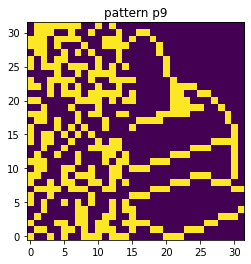

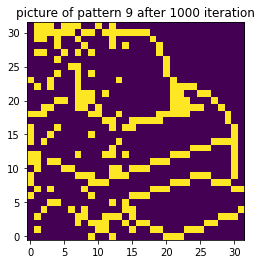

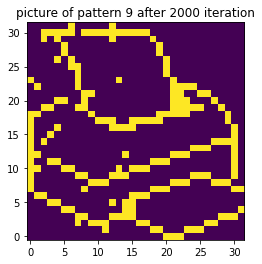

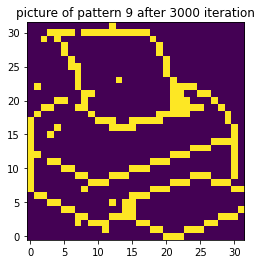

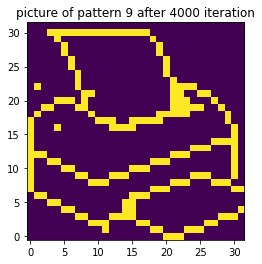

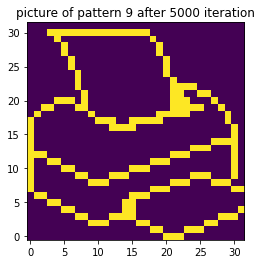

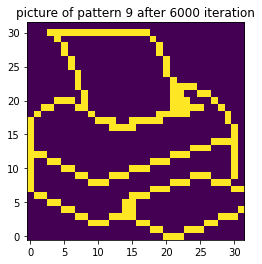

In [34]:

max_iteration = 6000
nb_image_desired = 6
clic = max_iteration/nb_image_desired
display(data[9], "pattern p9")
_, _ = training_at_random(weight, distorted_p1, max_iteration, clic, True)


3.3 Energy

What is the energy at the different attractors ?
-> The Energy is minimal and maybe null..?

What is the energy at the points of the distorted patterns?
-> The energy is maximum ...?

Truc important à savoir pour cette partie :
 - On calcule l'énergie
 - On regarde quand elle se stabilise mais c'est chaud parce que ça oscille un peu en local
 - On regarde ce que ça fait de distribuer les poids avec une lois normale centrée
 - Enfin on regarde ce que ça fait de rendre symétrique la matrice de poids

In [35]:
# We keep the same training function but we add the energy computation
# Je renomme la fonction mais c'est le même procédé de learning
import matplotlib.pyplot as plt


def energy(pattern, w, check = False , energy_old = None, cv_NRJ = None):
    new_energy = np.sum(-np.dot(pattern, np.dot(w, pattern.T)))
    if not check:
        return new_energy
    else :
        if new_energy == energy_old :
            cv_NRJ += 1
        else:
            cv_NRJ = 0
        return(new_energy)

def sequential_training(weight,pattern, max_iteration=100, clic=10, displaying = False):
    W = weight.copy()
    X = pattern.copy()
    energy_old = energy(X, W)
    cv_NRJ = 0
    count = 0
    energy_list = [energy_old]
    while (count <= max_iteration):
        for i in range(X.shape[0]):
            idx = np.random.randint(0, X.shape[1])
            X[i, idx] = np.where((X[i, :] @ W[idx]) >= 0, 1, -1) #Update rule with randomness
        count+=1
        if displaying and count%clic == 0:
            display(X, "picture of pattern after "+str(count)+" iteration")
        energy_new = energy(X, W, True, energy_old, cv_NRJ)
        energy_list.append(energy_new)
        energy_old = energy_new
        if cv_NRJ  > 3 :
            break

    return X, energy_list

import random

def compute_weights_normal(X, symmetrisize=False):
    n = X.shape[0]  # patterns
    m = X.shape[1]  # neurons
    W = 0
    outer_products = [np.array([np.outer(X[i], X[i])]) for i in range(n)]
    for i in range(len(outer_products)):
        W += outer_products[i]
    weight = W[0, :, :]
    for i in range(m):
        for j in range(m):
            weight[i, j] = random.normalvariate(0, 1) #la variance est peu être un peu grande, peut être qu'il faudra en étudier l'effet
    if symmetrisize:
        weight = 0.5 * (weight + weight.T)
    return(weight)





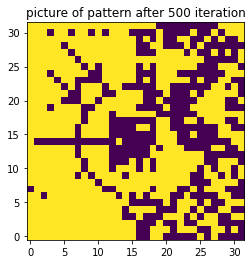

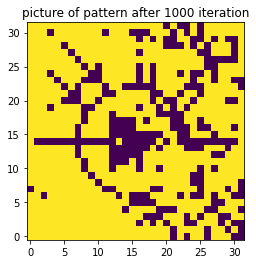

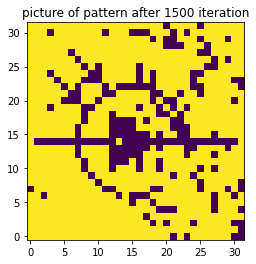

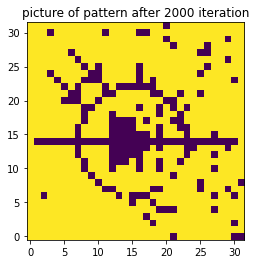

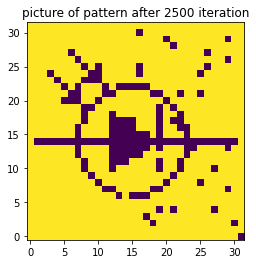

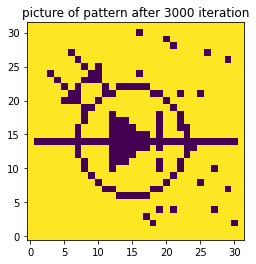

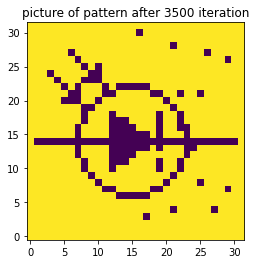

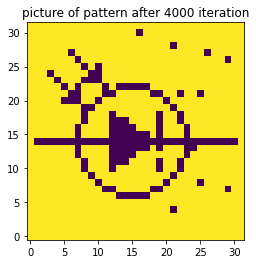

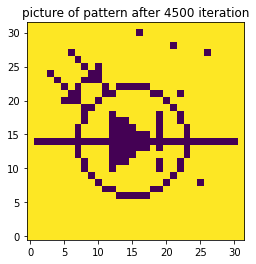

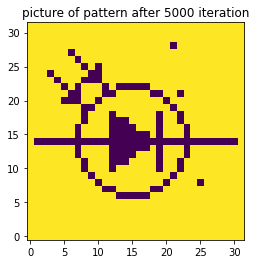

Text(0.5, 1.0, 'Energy evolution over iterations with pattern p10')

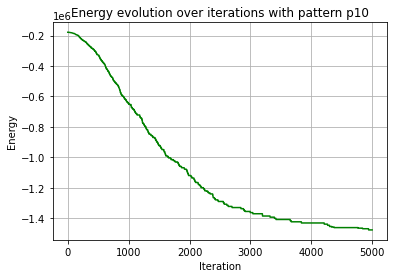

In [36]:
# Test with computation of weights like before
patterns = data[:3, :].copy()
weight = compute_weights(patterns)
distorted_p2_p3 = data[10:11, :].copy()

max_iteration = 5000
nb_image_desired = 10
clic = max_iteration/nb_image_desired
_, energy_list_classic = sequential_training(weight, distorted_p2_p3, max_iteration,clic,True)


plt.figure(1)
plt.plot(np.arange(len(energy_list_classic)),energy_list_classic,'green')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.title("Energy evolution over iterations with pattern p10")

Text(0.5, 1.0, 'Energy evolution over iterations')

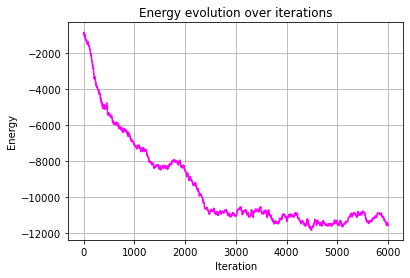

In [37]:


# Test with computation of weights like before
patterns = data[:3, :].copy()
weight_normal = compute_weights_normal(patterns)
distorted_p2_p3 = data[10:11, :].copy()

max_iteration = 6000
nb_image_desired = 10
clic = max_iteration/nb_image_desired
_, energy_list_normal = sequential_training(weight_normal, distorted_p2_p3, max_iteration,clic,False)


plt.figure(2)
plt.plot(np.arange(len(energy_list_normal)),energy_list_normal,'magenta')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.title("Energy evolution over iterations")

Text(0.5, 1.0, 'Energy evolution over iterations')

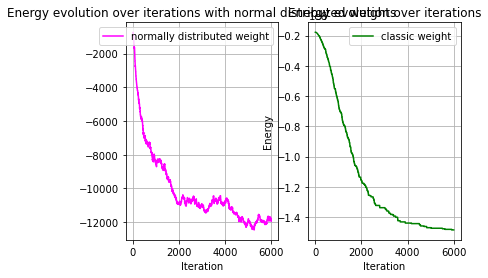

In [38]:
_, energy_list_classic = sequential_training(weight, distorted_p2_p3, max_iteration)
_, energy_list_normal = sequential_training(weight_normal, distorted_p2_p3, max_iteration)

plt.figure(3)
plt.subplot(1,2,1)
plt.plot(np.arange(len(energy_list_normal)),energy_list_normal,'magenta',label='normally distributed weight')
plt.xlabel("Iteration")
plt.grid(True)
plt.legend()
plt.title("Energy evolution over iterations with normal distributed weights")

plt.subplot(1,2,2)
plt.plot(np.arange(len(energy_list_classic)),energy_list_classic,'green',label='classic weight')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.title("Energy evolution over iterations")

In [39]:
# effect of putting the weight matrix symmetric

weight_normal_symmetric = compute_weights_normal(patterns,True)
weight_classic_symmetric = compute_weights(patterns)
weight_classic_symmetric = 0.5 * (weight_classic_symmetric.T + weight_classic_symmetric)

_, energy_list_classic_symmetric = sequential_training(weight_classic_symmetric, distorted_p2_p3, max_iteration)
_, energy_list_normal_symmetric = sequential_training(weight_normal_symmetric, distorted_p2_p3, max_iteration, clic, False)



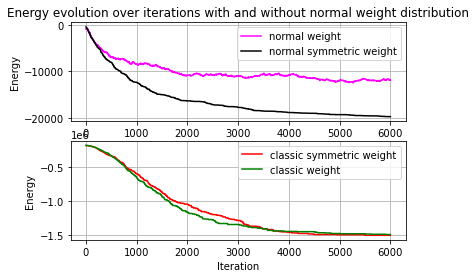

In [40]:
plt.figure(4)
plt.subplot(2,1,1)
plt.plot(np.arange(len(energy_list_normal)),energy_list_normal,'magenta',label='normal weight')
plt.plot(np.arange(len(energy_list_normal_symmetric)),energy_list_normal_symmetric,'black',label='normal symmetric weight')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.title("Energy evolution over iterations with and without normal weight distribution")
plt.subplot(2,1,2)
plt.plot(np.arange(len(energy_list_classic_symmetric)),energy_list_classic_symmetric,'red',label='classic symmetric weight')
plt.plot(np.arange(len(energy_list_classic)),energy_list_classic,'green',label='classic weight')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()


3.4 Distorsion Resistance
(Côme d'habitude)

In [41]:
# Flipping the data

data = np.loadtxt('pict.dat', delimiter=",", dtype=int).reshape(-1, 1024)

patterns = data[:3, :].copy()
weight = compute_weights(patterns)




def flipping(data, flipping_rate):
    the_data = data.copy()
    random.seed(98)
    longueur = len(data)
    nb_flipping = int(np.floor(flipping_rate*longueur/2))
    for i in range(nb_flipping):
        nb1 = random.randint(0,np.floor(longueur/2))
        nb2 = random.randint(0,np.floor(longueur/2))
        the_data[nb1] = data[longueur - nb2]
        the_data[longueur - nb2] = data[nb1]
    return the_data


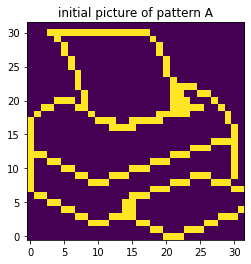

Noise = 0.0


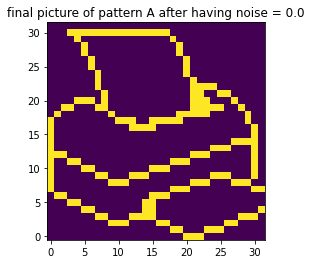

Noise = 0.1


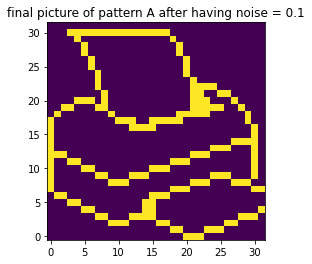

Noise = 0.2


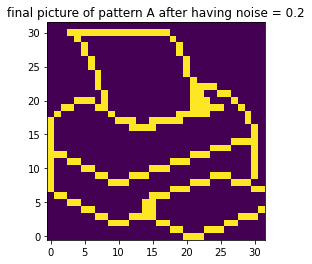

Noise = 0.30000000000000004


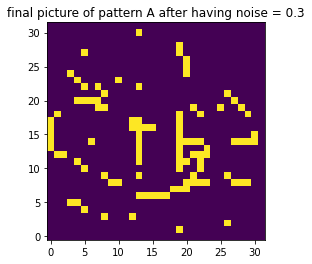

Noise = 0.4


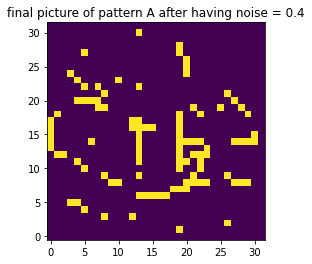

Noise = 0.5


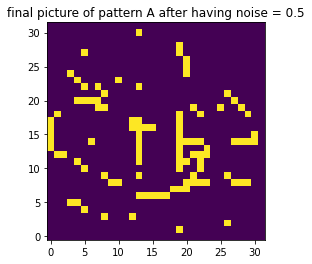

Noise = 0.6000000000000001


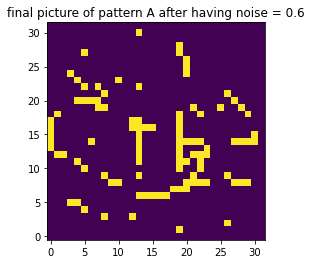

Noise = 0.7000000000000001


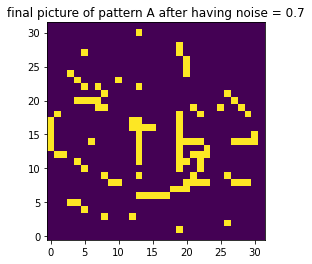

Noise = 0.8


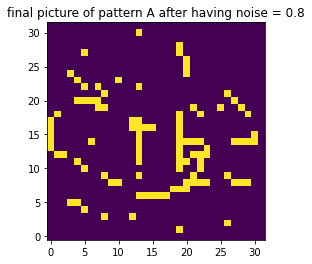

Noise = 0.9


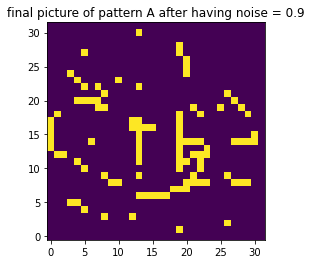

Noise = 1.0


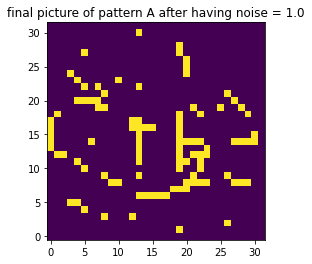

In [42]:
# pattern 1

max_iteration = 5000
the_flipping_rates = [0.1*i for i in range(11)]
data1 = patterns[0]
display(np.array([data1]), "initial picture of pattern A")
for elt in the_flipping_rates:
    data1 = flipping(patterns[0],elt)
    print("Noise = " + str(elt))
    X, _ = training(weight, np.array([data1]), max_iteration)
    display(X, "final picture of pattern A after having noise = " + str(round(elt,2)))


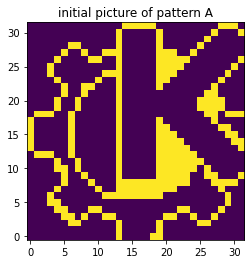

Noise = 0.0


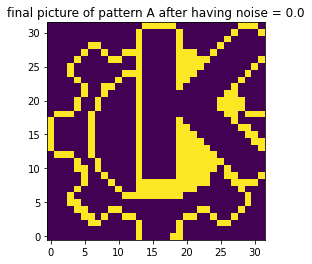

Noise = 0.1


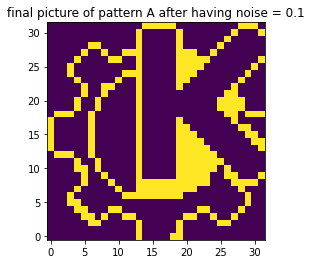

Noise = 0.2


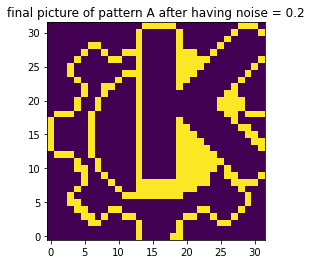

Noise = 0.30000000000000004


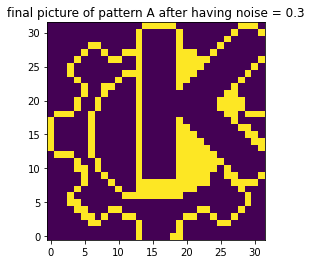

Noise = 0.4


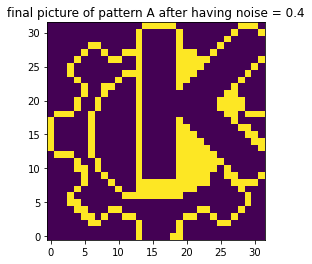

Noise = 0.5


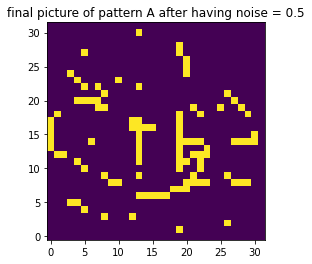

Noise = 0.6000000000000001


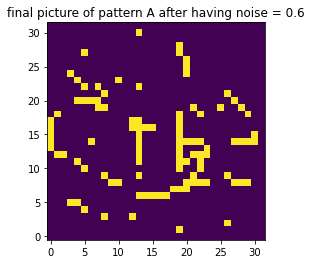

Noise = 0.7000000000000001


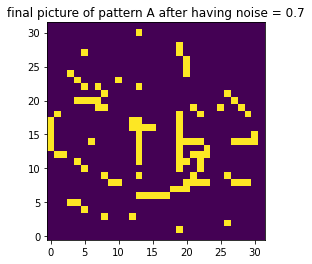

Noise = 0.8


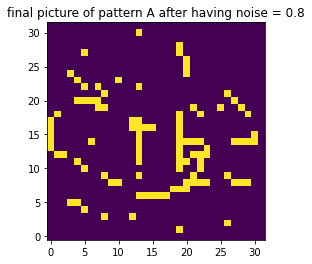

Noise = 0.9


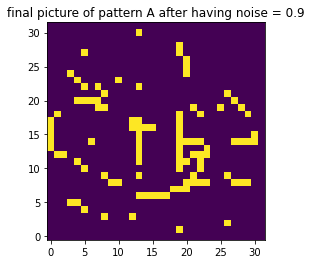

Noise = 1.0


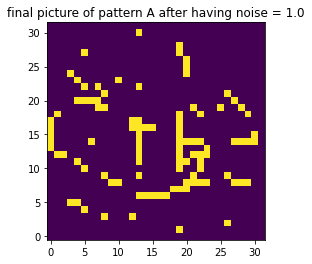

In [43]:
# pattern 2

max_iteration = 5000
the_flipping_rates = [0.1*i for i in range(11)]
data2 = patterns[1]
display(np.array([data2]), "initial picture of pattern A")
for elt in the_flipping_rates:
    data2 = flipping(patterns[1],elt)
    print("Noise = " + str(elt))
    X, _ = training(weight, np.array([data2]), max_iteration)
    display(X, "final picture of pattern A after having noise = " + str(round(elt,2)))


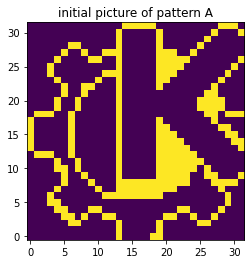

Noise = 0.0


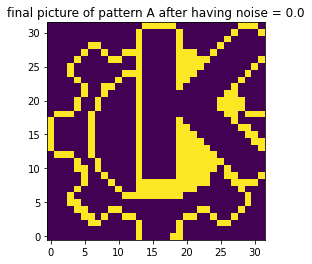

Noise = 0.1


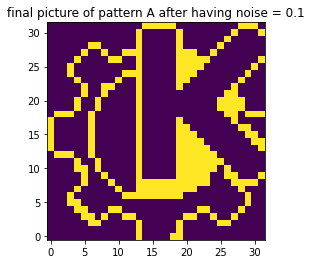

Noise = 0.2


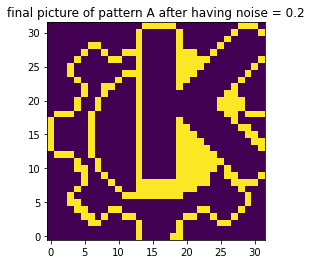

Noise = 0.30000000000000004


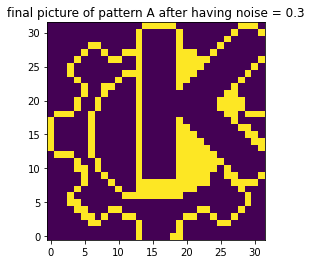

Noise = 0.4


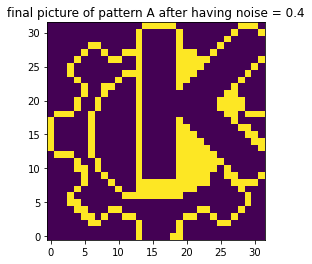

Noise = 0.5


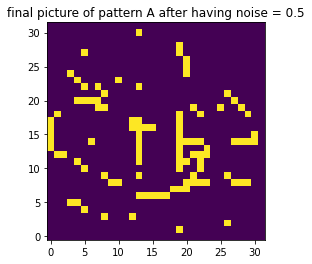

Noise = 0.6000000000000001


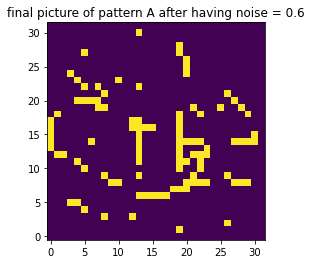

Noise = 0.7000000000000001


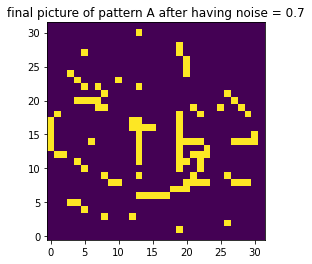

Noise = 0.8


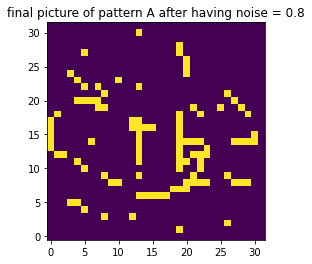

Noise = 0.9


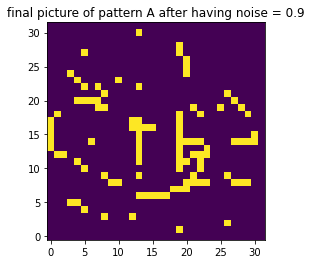

Noise = 1.0


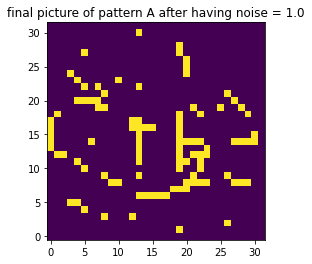

In [44]:
# With less iterations

max_iteration = 0
the_flipping_rates = [0.1*i for i in range(11)]
data2 = patterns[1]
display(np.array([data2]), "initial picture of pattern A")
for elt in the_flipping_rates:
    data2 = flipping(patterns[1],elt)
    print("Noise = " + str(elt))
    X, _ = training(weight, np.array([data2]), max_iteration)
    display(X, "final picture of pattern A after having noise = " + str(round(elt,2)))

Noise = 0.0


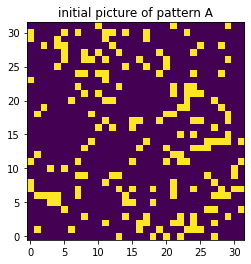

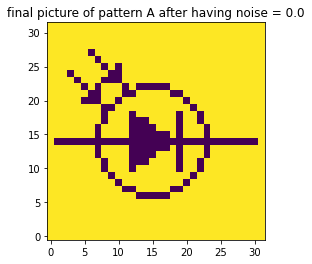

Noise = 0.1


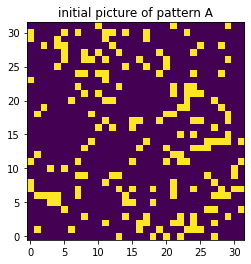

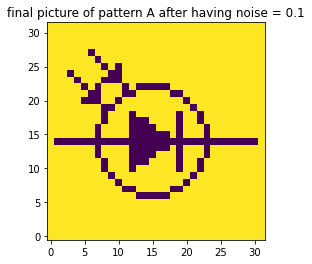

Noise = 0.2


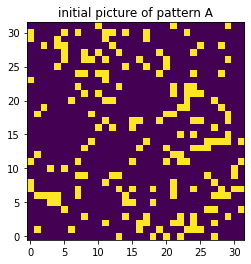

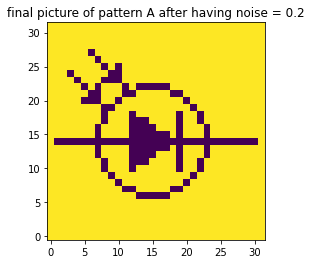

Noise = 0.30000000000000004


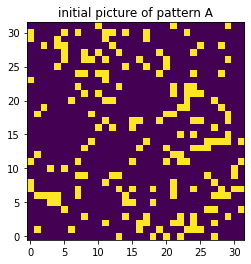

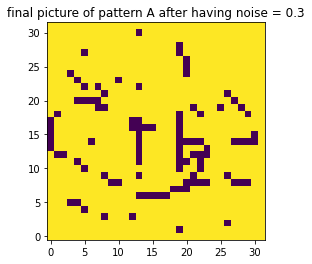

Noise = 0.4


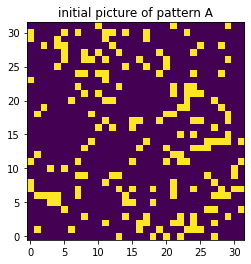

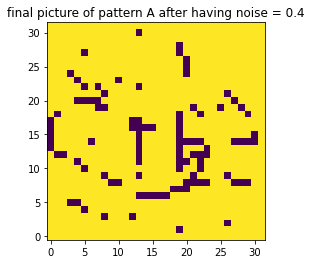

Noise = 0.5


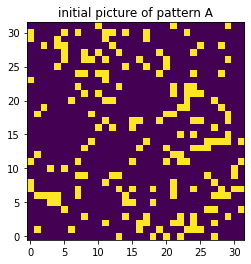

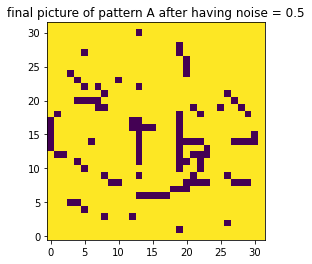

Noise = 0.6000000000000001


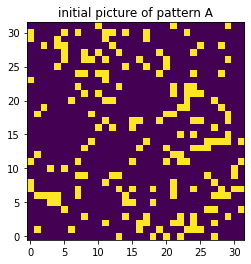

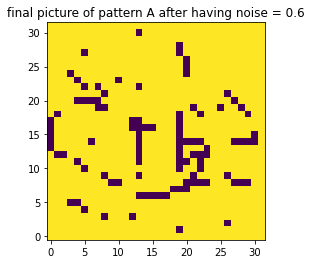

Noise = 0.7000000000000001


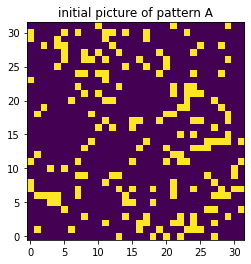

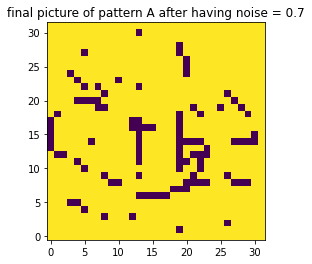

Noise = 0.8


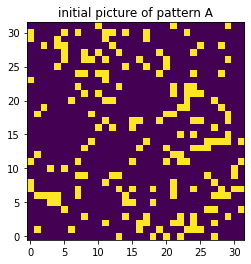

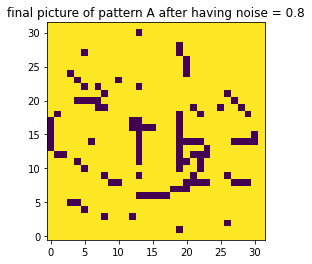

Noise = 0.9


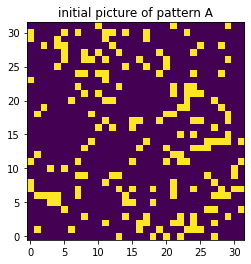

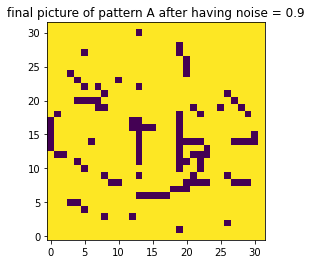

Noise = 1.0


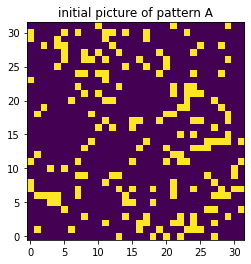

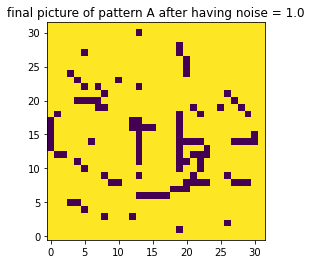

In [45]:
# pattern 3

max_iteration = 5000
the_flipping_rates = [0.1*i for i in range(11)]
data3 = patterns[2]
for elt in the_flipping_rates:
    data3 = flipping(patterns[2],elt)
    print("Noise = " + str(elt))
    display(np.array([data1]), "initial picture of pattern A")
    X, _ = training(weight, np.array([data3]), max_iteration)
    display(X, "final picture of pattern A after having noise = " + str(round(elt,2)))

3.5 Capacity

Text(0.5, 1.0, 'Energy evolution over iterations with different number of learned patterns on p2_p3 recognition')

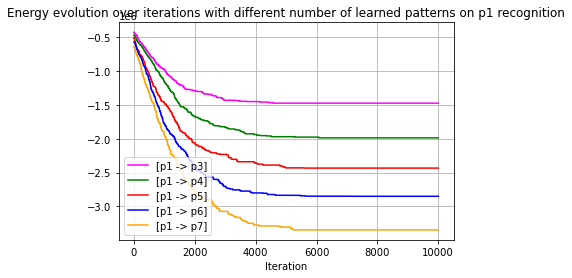

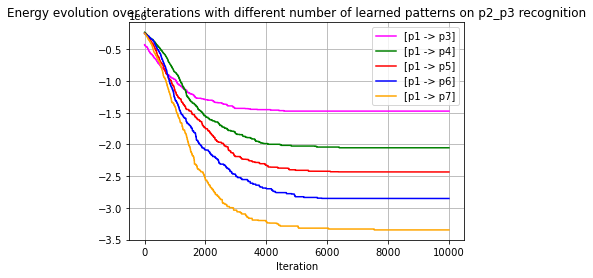

In [46]:
max_iteration = 10000

patterns_until_p3 = data[:3, :].copy()
patterns_until_p4 = data[:4, :].copy()
patterns_until_p5 = data[:5, :].copy()
patterns_until_p6 = data[:6, :].copy()
patterns_until_p7 = data[:7, :].copy()


weight_until_p3 = compute_weights(patterns_until_p3)
weight_until_p4 = compute_weights(patterns_until_p4)
weight_until_p5 = compute_weights(patterns_until_p5)
weight_until_p6 = compute_weights(patterns_until_p6)
weight_until_p7 = compute_weights(patterns_until_p7)

_, energy_until_p3_with_p1_recognition = sequential_training(weight_until_p3, distorted_p1, max_iteration)
_, energy_until_p4_with_p1_recognition = sequential_training(weight_until_p4, distorted_p1, max_iteration)
_, energy_until_p5_with_p1_recognition = sequential_training(weight_until_p5, distorted_p1, max_iteration)
_, energy_until_p6_with_p1_recognition = sequential_training(weight_until_p6, distorted_p1, max_iteration)
_, energy_until_p7_with_p1_recognition = sequential_training(weight_until_p7, distorted_p1, max_iteration)

_, energy_until_p3_with_p2_p3_recognition = sequential_training(weight_until_p3, distorted_p2_p3, max_iteration)
_, energy_until_p4_with_p2_p3_recognition = sequential_training(weight_until_p4, distorted_p2_p3, max_iteration)
_, energy_until_p5_with_p2_p3_recognition = sequential_training(weight_until_p5, distorted_p2_p3, max_iteration)
_, energy_until_p6_with_p2_p3_recognition = sequential_training(weight_until_p6, distorted_p2_p3, max_iteration)
_, energy_until_p7_with_p2_p3_recognition = sequential_training(weight_until_p7, distorted_p2_p3, max_iteration)




plt.figure(5)
plt.plot(np.arange(len(energy_until_p3_with_p1_recognition)),energy_until_p3_with_p1_recognition,'magenta',label='[p1 -> p3]')
plt.plot(np.arange(len(energy_until_p4_with_p1_recognition)),energy_until_p4_with_p1_recognition,'green',label='[p1 -> p4]')
plt.plot(np.arange(len(energy_until_p5_with_p1_recognition)),energy_until_p5_with_p1_recognition,'red',label='[p1 -> p5]')
plt.plot(np.arange(len(energy_until_p6_with_p1_recognition)),energy_until_p6_with_p1_recognition,'blue',label='[p1 -> p6]')
plt.plot(np.arange(len(energy_until_p7_with_p1_recognition)),energy_until_p7_with_p1_recognition,'orange',label='[p1 -> p7]')
plt.xlabel("Iteration")
plt.grid(True)
plt.legend()
plt.title("Energy evolution over iterations with different number of learned patterns on p1 recognition")

plt.figure(6)
plt.plot(np.arange(len(energy_until_p3_with_p2_p3_recognition)),energy_until_p3_with_p1_recognition,'magenta',label='[p1 -> p3]')
plt.plot(np.arange(len(energy_until_p4_with_p2_p3_recognition)),energy_until_p4_with_p2_p3_recognition,'green',label='[p1 -> p4]')
plt.plot(np.arange(len(energy_until_p5_with_p2_p3_recognition)),energy_until_p5_with_p2_p3_recognition,'red',label='[p1 -> p5]')
plt.plot(np.arange(len(energy_until_p6_with_p2_p3_recognition)),energy_until_p6_with_p2_p3_recognition,'blue',label='[p1 -> p6]')
plt.plot(np.arange(len(energy_until_p7_with_p2_p3_recognition)),energy_until_p7_with_p2_p3_recognition,'orange',label='[p1 -> p7]')
plt.xlabel("Iteration")
plt.grid(True)
plt.legend()
plt.title("Energy evolution over iterations with different number of learned patterns on p2_p3 recognition")


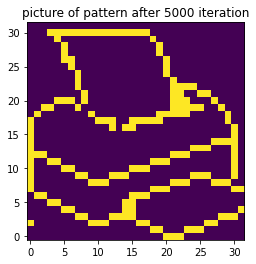

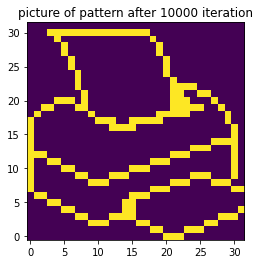

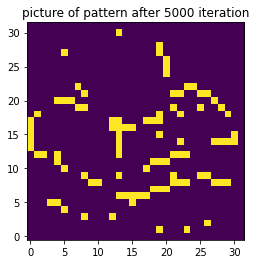

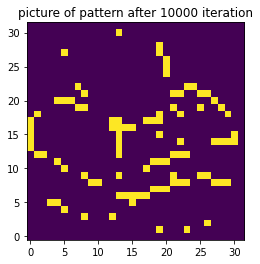

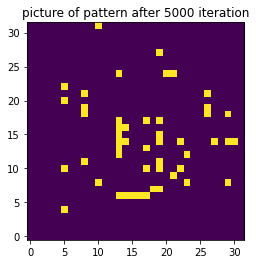

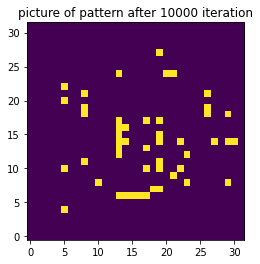

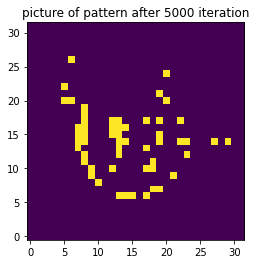

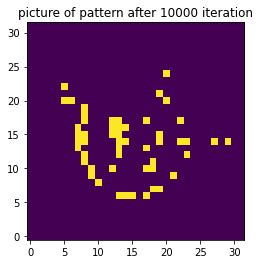

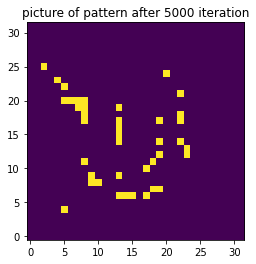

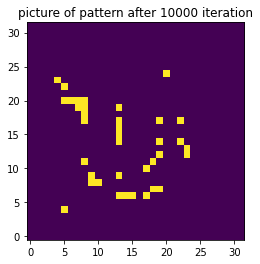

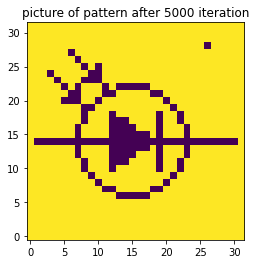

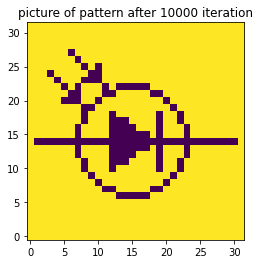

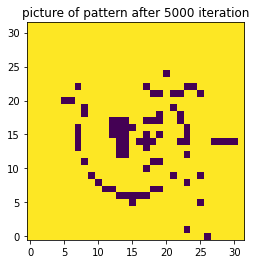

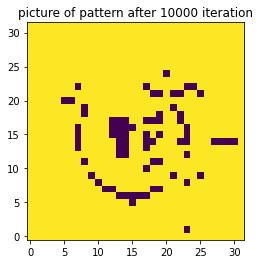

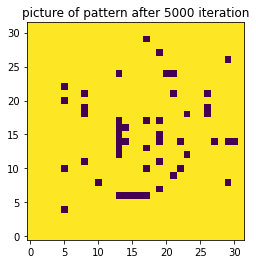

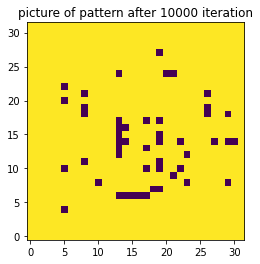

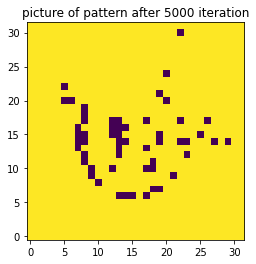

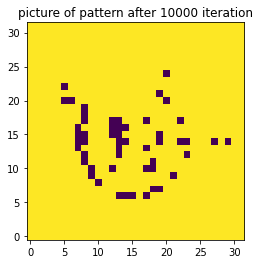

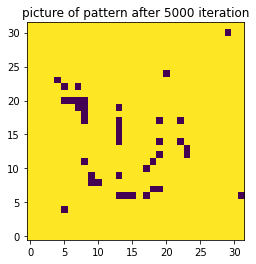

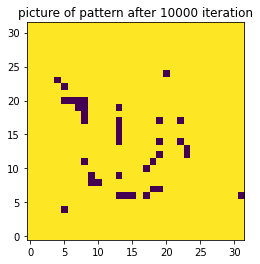

In [47]:
nb_image_desired = 2
clic = max_iteration/nb_image_desired


_, energy_until_p3_with_p1_recognition = sequential_training(weight_until_p3, distorted_p1, max_iteration, clic, True)
_, energy_until_p4_with_p1_recognition = sequential_training(weight_until_p4, distorted_p1, max_iteration , clic, True)
_, energy_until_p5_with_p1_recognition = sequential_training(weight_until_p5, distorted_p1, max_iteration, clic, True)
_, energy_until_p6_with_p1_recognition = sequential_training(weight_until_p6, distorted_p1, max_iteration, clic, True)
_, energy_until_p7_with_p1_recognition = sequential_training(weight_until_p7, distorted_p1, max_iteration, clic, True)

_, energy_until_p3_with_p2_p3_recognition = sequential_training(weight_until_p3, distorted_p2_p3, max_iteration, clic, True)
_, energy_until_p4_with_p2_p3_recognition = sequential_training(weight_until_p4, distorted_p2_p3, max_iteration, clic, True)
_, energy_until_p5_with_p2_p3_recognition = sequential_training(weight_until_p5, distorted_p2_p3, max_iteration, clic, True)
_, energy_until_p6_with_p2_p3_recognition = sequential_training(weight_until_p6, distorted_p2_p3, max_iteration, clic, True)
_, energy_until_p7_with_p2_p3_recognition = sequential_training(weight_until_p7, distorted_p2_p3, max_iteration, clic, True)

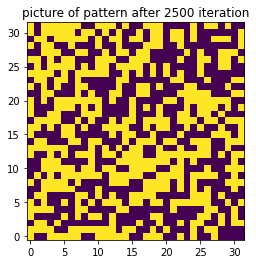

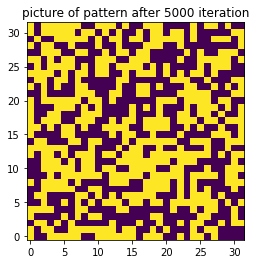

In [48]:

def pattern_random(nb_node, nb_pattern=1):
    return np.array(np.random.choice([-1, 1], size=nb_node * nb_pattern)).reshape(-1, nb_node)



data = np.loadtxt('pict.dat', delimiter=",", dtype=int).reshape(-1, 1024)
distorted_p1 = data[9:10, :].copy()
distorted_p2_p3 = data[10:11, :].copy()
max_iteration = 5000

pattern = pattern_random(distorted_p1.shape[1], distorted_p1.shape[0])
weight = compute_weights(pattern)

nb_image_desired = 2
clic = max_iteration/nb_image_desired


X, energy_list = sequential_training(weight,distorted_p1, max_iteration, clic, True)


-- A finir --
Note de Victor :
-> dans la section juste au dessus j'ai initialisé mes poids avec une matrice random ... ce qui n'a pas trop de sens mais bref (ils veulent qu'on fasse ça et on se rend compte au final que ça marche pas... normal en fait)


*Questions à finir* : 


 -> It has been shown that the capacity of a Hop eld network is around 0:138N. How do you explain the di erence between random patterns and the pictures?

Create 300 random patterns and train a 100-unit (or larger) network with them. After each new pattern has been added to the weight matrix, calculate how many of the earlier patterns remain stable (a single iteration does not cause
them to change) and plot it.
_ What happens with the number of stable patterns as more are learned?
_ What happens if convergence to the pattern from a noisy version (a few flipped units) is used? What does the di erent behavior for large number
of patterns mean?

The self-connections wii are always positive and quite strong; they always
support units to remain at their current state. If you remove them and compare
the curves from pure and noisy patterns for large number of patterns you will
see that the di erence goes away. In general it is a good idea to remove self-
connections, even though it seems that this step lowers the memory performance.
In fact, self-connections promote the formation of spurious patterns and have
negative e ect on noise removal capabilities.
_  What is the maximum number of retrievable patterns for this network?
_  What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100))
or something similar to make them contain more +1? How does this relate
to the capacity results of the picture patterns?

3.6 Sparse Patterns
(Côme d'habitude)

In [49]:
def average_activity(X):
    P = X.shape[0]
    N = X.shape[1]
    return np.sum(X)*(1/(N*P))

def compute_weights_sparse(X):
    P = X.shape[0]
    N = X.shape[1]
    rho = average_activity(X)*np.ones((P,N), dtype=int)
    return (X-rho).T @ (X-rho)


def sgnWX_sparse(W,X,theta,i):
    return 0.5*np.ones((X.shape[1])) + 0.5*np.where(W@X[i] - theta*np.ones((X.shape[1])) >= 0, 1, -1)


def training_sparse(weight,pattern, theta, max_iteration=100):
    W = weight.copy()
    X = pattern.copy()
    count = 0

    while (count <= max_iteration):
        fixed_point_idx_list = []
        for i in range(X.shape[0]):
            if (sgnWX_sparse(W, X, theta,i) == X[i]).all: # W = sgn(WX) ?
                #print("A fixed point has been reached !")
                fixed_point_idx_list.append(i)
            
            X[i] = sgnWX_sparse(W, X, theta, i) #Update rule
        count+=1
    return X, fixed_point_idx_list
    